<a href="https://colab.research.google.com/github/ChanyutJean/2143488-Big-Data-AI-HW/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Data

In [11]:
# Run this to get AutoReg class, then restart runtime.
!pip install statsmodels --upgrade

In [12]:
# Don't forget to import data!
import pandas as pd
df = pd.read_csv("HW5_PRSA_Data_Tiantan.csv")

In [13]:
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.isna())

   No  year  month  day  hour  PM2.5  ...    PRES  DEWP  RAIN   wd  WSPM  station
0   1  2013      3    1     0    6.0  ...  1024.5 -21.4   0.0  NNW   5.7  Tiantan
1   2  2013      3    1     1    6.0  ...  1025.1 -22.1   0.0   NW   3.9  Tiantan
2   3  2013      3    1     2    6.0  ...  1025.3 -24.6   0.0  NNW   5.3  Tiantan
3   4  2013      3    1     3    6.0  ...  1026.2 -25.5   0.0    N   4.9  Tiantan
4   5  2013      3    1     4    5.0  ...  1027.1 -24.5   0.0  NNW   3.2  Tiantan

[5 rows x 18 columns]
          No  year  month  day  hour  ...  DEWP  RAIN   wd  WSPM  station
35059  35060  2017      2   28    19  ... -16.2   0.0   NW   2.4  Tiantan
35060  35061  2017      2   28    20  ... -15.1   0.0  WNW   0.9  Tiantan
35061  35062  2017      2   28    21  ... -13.3   0.0   NW   1.1  Tiantan
35062  35063  2017      2   28    22  ... -12.9   0.0  NNW   1.2  Tiantan
35063  35064  2017      2   28    23  ... -15.9   0.0  NNE   1.3  Tiantan

[5 rows x 18 columns]
<class 'pandas.cor

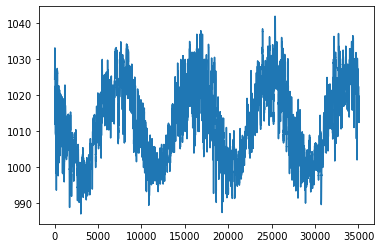

In [14]:
df['PRES'].plot.line()

# Preprocessing Data

In [15]:
df2 = df.copy()
df2['datetime']=df2['year'].astype(str).str.cat([df2['month'].astype(str),df2['day'].astype(str),df2['hour'].astype(str)], sep='-')
df2['datetime']=pd.to_datetime(df2['datetime'],format='%Y-%m-%d-%H')

In [16]:
df3 = df2[['datetime', 'PRES']]
df3 = df3.set_index(df3['datetime'])
df3 = df3.drop('datetime',axis=1)

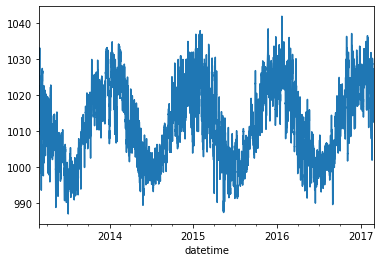

In [17]:
df3['PRES'].plot.line()

In [18]:
df3 = df3.resample('D').mean().round(2)
df3.head()

,PRES
datetime,
2013-03-01,1028.78
2013-03-02,1028.85
2013-03-03,1016.46
2013-03-04,1019.45
2013-03-05,1012.70


In [19]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df3,test_size=0.1,shuffle=False)

# Visualizing Data

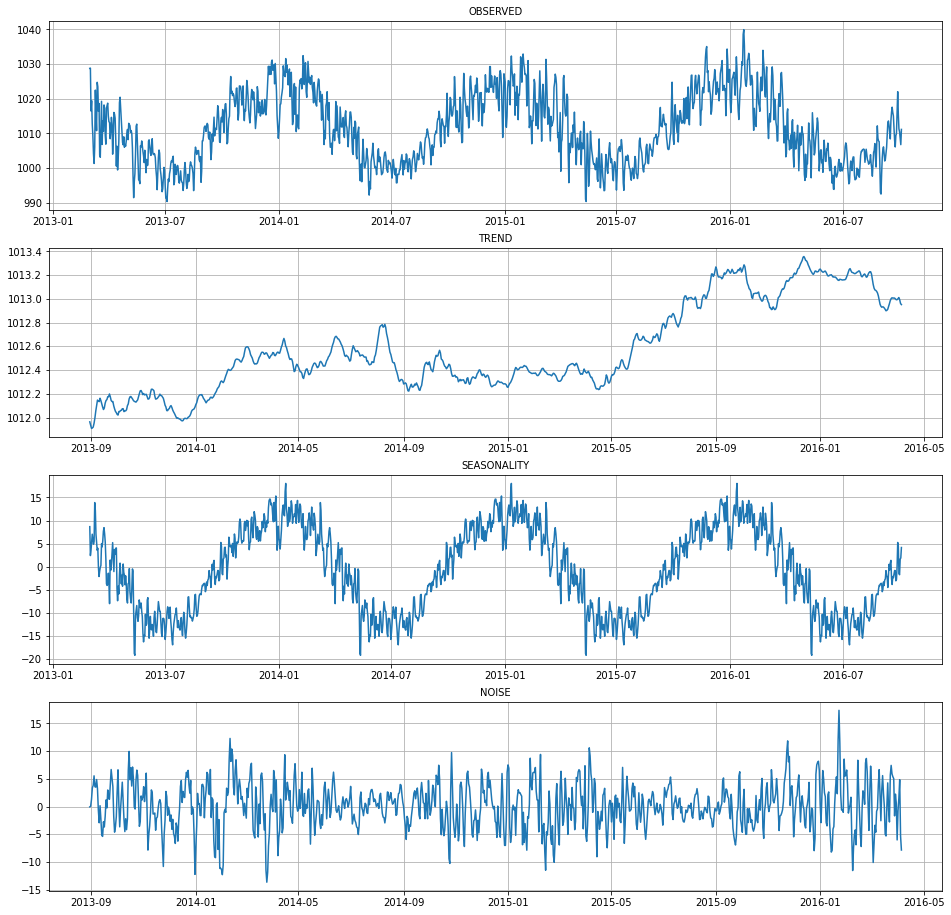

In [20]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

res = sm.tsa.seasonal_decompose(df_train['PRES'], period=365)
fig, axs = plt.subplots(4, figsize=(16,16))
axs[0].set_title('OBSERVED', fontsize=10)
axs[0].plot(res.observed)
axs[0].grid()

axs[1].set_title('TREND', fontsize=10)
axs[1].plot(res.trend)
axs[1].grid()

axs[2].set_title('SEASONALITY', fontsize=10)
axs[2].plot(res.seasonal)
axs[2].grid()

axs[3].set_title('NOISE', fontsize=10)
axs[3].plot(res.resid)
axs[3].grid()

plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


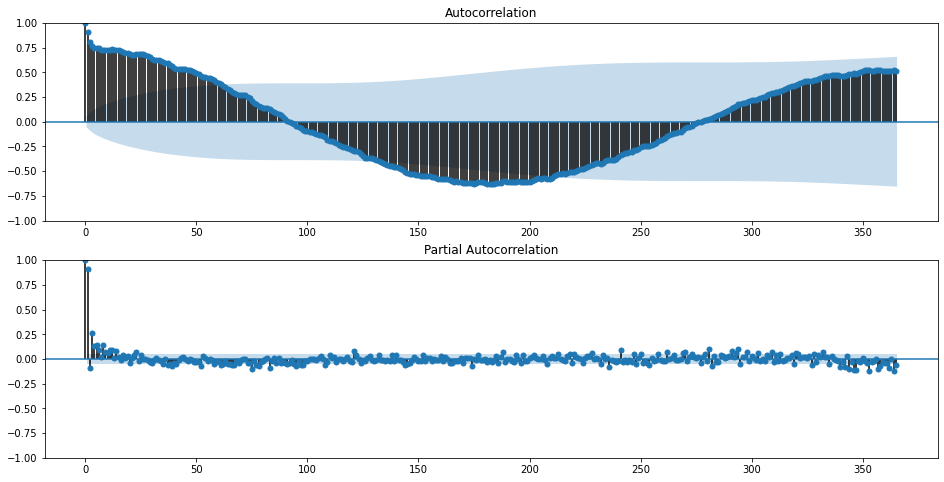

In [21]:
fig, axs = plt.subplots(2, figsize=(16,8))
sm.graphics.tsa.plot_acf(df_train['PRES'],ax=axs[0],lags=365)
sm.graphics.tsa.plot_pacf(df_train['PRES'],ax=axs[1],lags=365)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


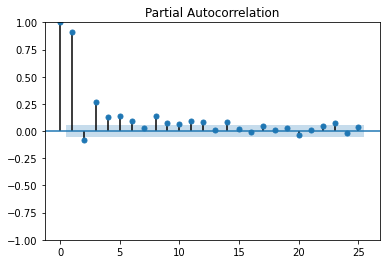

In [22]:
# Let's zoom in on PACF
sm.graphics.tsa.plot_pacf(df_train['PRES'],lags=25)
plt.show()

# Modeling Data

In [23]:
from statsmodels.tsa.ar_model import AutoReg
model=AutoReg(df_train['PRES'],lags=8,trend='t',seasonal=True,period=365,exog=None,missing='drop')
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   PRES   No. Observations:                 1314
Model:               Seas. AutoReg(8)   Log Likelihood               -3339.042
Method:               Conditional MLE   S.D. of innovations              3.120
Date:                Mon, 07 Feb 2022   AIC                           7428.084
Time:                        08:50:00   BIC                           9368.605
Sample:                    03-09-2013   HQIC                          8156.007
                         - 10-04-2016                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
trend          0.0003      0.000      1.278      0.201      -0.000       0.001
s(1,365)     415.2374     35.849     11.583      0.000     344.975     485.500
s(2,365)     410.0547     35.858     11.435      0.000     339.774     480.335
s(3,365)     415.7300     35.827     11.604      0.000     345.510     485.950
s(4,365)     414.8365     35.794     11.590      0.000     344.682     484.991
s(5,365)     415.6560     35.788     11.614      0.000     345.512     485.800
s(6,365)     413.9541     35.774     11.572      0.000     343.839     484.069
s(7,365)     414.0315     35.781     11.571      0.000     343.903     484.160
s(8,365)     415.3063     35.749     11.617      0.000     345.240     485.372
s(9,365)     420.2358     35.699     11.772      0.000     350.266     490.205
s(10,365)    416.7986     35.715     11.670      0.000     346.798     486.800
s(11,365)    411.5332     35.715     11.523      0.000     341.533     481.533
s(12,365)    413.5553     35.703     11.583      0.000     343.579     483.532
s(13,365)    416.0560     35.695     11.656      0.000     346.096     486.016
s(14,365)    413.9953     35.705     11.595      0.000     344.015     483.975
s(15,365)    409.4078     35.699     11.468      0.000     339.440     479.376
s(16,365)    412.7872     35.654     11.578      0.000     342.907     482.667
s(17,365)    409.6275     35.687     11.478      0.000     339.683     479.572
s(18,365)    412.3005     35.656     11.563      0.000     342.416     482.185
s(19,365)    412.9142     35.594     11.601      0.000     343.152     482.676
s(20,365)    417.5246     35.562     11.741      0.000     347.824     487.225
s(21,365)    410.0332     35.605     11.516      0.000     340.249     479.817
s(22,365)    416.8890     35.571     11.720      0.000     347.172     486.606
s(23,365)    413.9270     35.568     11.638      0.000     344.216     483.638
s(24,365)    417.0355     35.579     11.722      0.000     347.303     486.768
s(25,365)    413.4264     35.605     11.612      0.000     343.642     483.211
s(26,365)    411.8220     35.626     11.560      0.000     341.996     481.648
s(27,365)    411.1516     35.628     11.540      0.000     341.322     480.981
s(28,365)    410.9797     35.657     11.526      0.000     341.093     480.867
s(29,365)    411.7061     35.604     11.563      0.000     341.923     481.489
s(30,365)    411.8605     35.608     11.566      0.000     342.070     481.651
s(31,365)    412.6373     35.588     11.595      0.000     342.885     482.389
s(32,365)    410.0070     35.587     11.521      0.000     340.257     479.757
s(33,365)    408.6229     35.537     11.498      0.000     338.971     478.275
s(34,365)    416.3564     35.471     11.738      0.000     346.835     485.877
s(35,365)    409.5869     35.484     11.543      0.000     340.039     479.134
s(36,365)    414.6550     35.450     11.697      0.000     345.174     484.135
s(37,365)    413.1015     35.478     11.644      0.000     343.567     482.636
s(

In [27]:
print(df_train.head())
print(df_train.tail())
print(df_test.head())
print(df_test.tail())

               PRES
datetime           
2013-03-01  1028.78
2013-03-02  1028.85
2013-03-03  1016.46
2013-03-04  1019.45
2013-03-05  1012.70
               PRES
datetime           
2016-09-30  1011.28
2016-10-01  1010.48
2016-10-02  1008.65
2016-10-03  1006.76
2016-10-04  1011.16
               PRES
datetime           
2016-10-05  1014.31
2016-10-06  1020.78
2016-10-07  1015.28
2016-10-08  1018.00
2016-10-09  1018.90
               PRES
datetime           
2017-02-24  1021.01
2017-02-25  1018.81
2017-02-26  1020.34
2017-02-27  1017.14
2017-02-28  1014.89


In [29]:
# Missing first 8 days due to lag.
df_train['pred_ar']=result.predict(start='2013-03-01',end='2016-10-04')
df_train.head(10)

,PRES,pred_ar
datetime,,
2013-03-01,1028.78,NaN
2013-03-02,1028.85,NaN
2013-03-03,1016.46,NaN
2013-03-04,1019.45,NaN
2013-03-05,1012.70,NaN
2013-03-06,1009.30,NaN
2013-03-07,1004.11,NaN
2013-03-08,1001.33,NaN
2013-03-09,1006.13,1012.760255


In [30]:
from sklearn.metrics import mean_absolute_percentage_error
df_train1=df_train.iloc[8:].copy()
print('MAPE: ', mean_absolute_percentage_error(df_train1['PRES'],df_train1['pred_ar']))

MAPE:  0.0023813101843560007


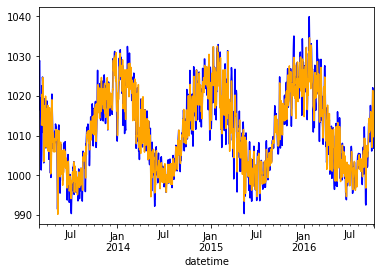

In [31]:
df_train['PRES'].plot(color='blue')
df_train['pred_ar'].plot(color='orange')
plt.show()

In [39]:
df_test['pred_ar']=result.predict(start='2016-10-05',end='2017-02-28')
print('MAPE: ', mean_absolute_percentage_error(df_test['PRES'],df_test['pred_ar']))

MAPE:  0.004665788158803754


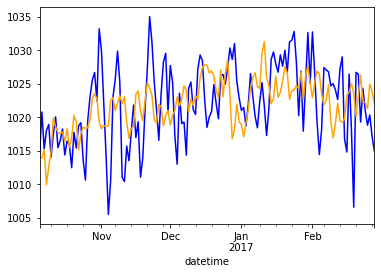

In [40]:
df_test['PRES'].plot(color='blue')
df_test['pred_ar'].plot(color='orange')
plt.show()

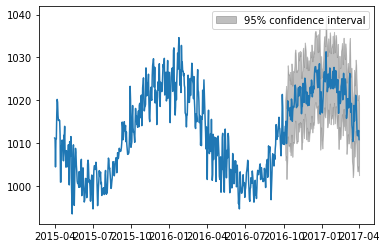

In [37]:
result.plot_predict('2015-04-01','2017-03-31')
plt.show()

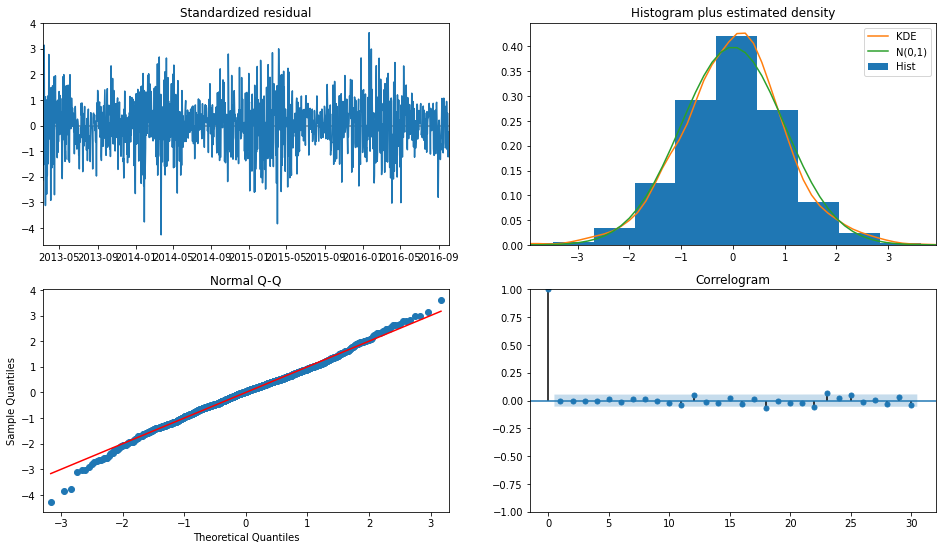

In [41]:
result.plot_diagnostics(figsize=(16,9),lags=30)
plt.show()

# Accept the model because MAPE on testing data is less than 1% and plot diagnostic shows no autocorrelation.

In [44]:
forecast = result.predict(start='2017-03-01',end='2017-03-31')
forecast

2017-03-01    1015.785935
2017-03-02    1017.002602
2017-03-03    1018.845935
2017-03-04    1020.372602
2017-03-05    1019.319268
2017-03-06    1018.195935
2017-03-07    1018.795935
2017-03-08    1024.995850
2017-03-09    1026.235284
2017-03-10    1020.077576
2017-03-11    1017.208900
2017-03-12    1019.266556
2017-03-13    1019.217385
2017-03-14    1014.140766
2017-03-15    1013.160031
2017-03-16    1010.360214
2017-03-17    1010.884055
2017-03-18    1013.132774
2017-03-19    1018.776525
2017-03-20    1015.153391
2017-03-21    1017.843149
2017-03-22    1018.645425
2017-03-23    1021.166565
2017-03-24    1019.970173
2017-03-25    1016.626449
2017-03-26    1013.257734
2017-03-27    1011.752842
2017-03-28    1011.710971
2017-03-29    1012.158058
2017-03-30    1012.947471
2017-03-31    1010.809818
Freq: D, dtype: float64

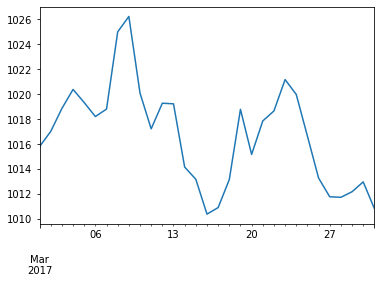

In [45]:
forecast.plot.line()